In [7]:
import sys
sys.path.append('func/')

import importlib
import func.feature_selection as feature_selection
import func.utils as utils

importlib.reload(utils)
importlib.reload(feature_selection)

import matplotlib.pyplot as plt

# Dataset selection

In [21]:
import openml
forex_selected = [41897, 41872, 41730]
datasets_active = openml.datasets.list_datasets(status="active", output_format="dataframe")
datasets_final = datasets_active.query(
    'NumberOfInstancesWithMissingValues == 0 & '
    'NumberOfMissingValues == 0 & '
    'NumberOfClasses == 2 & '
    'NumberOfFeatures > 10 &'
    'NumberOfFeatures < 150 &'
    'NumberOfInstances < 12000  &  '
    'NumberOfNumericFeatures == NumberOfFeatures - 1 '
)

unique_versions_final = datasets_final.drop_duplicates(subset="name", keep="last")
unduplicated_final = unique_versions_final.drop_duplicates(subset=['MajorityClassSize', 'MaxNominalAttDistinctValues', 'MinorityClassSize',
                           'NumberOfClasses', 'NumberOfFeatures', 'NumberOfInstances',
                           'NumberOfInstancesWithMissingValues', 'NumberOfMissingValues',
                           'NumberOfNumericFeatures', 'NumberOfSymbolicFeatures'], keep='first')

final_ds = unduplicated_final[unduplicated_final.format != 'Sparse_ARFF']
forex = final_ds[final_ds['name'].astype(str).str.startswith('FOREX')]['did'].to_list()
for d in forex_selected:
    forex.remove(d)

final_ds = final_ds[~final_ds['did'].isin(forex)]
ds_list = final_ds['did'].tolist()

# Experiments

In [ ]:
rsl_exp={}

importlib.reload(feature_selection)
rsl_path = 'rsl'
rsl_file_name = f'{rsl_path}/rsl_'
for ds in final_ds:
    rsl_exp = feature_selection.select(dataset=ds, rsl=rsl_exp, rsl_path=rsl_path)

# Load result

In [5]:
from datetime import datetime
import glob
import pandas as pd

all_rsl_files = glob.glob(rsl_path+'*')
all_ds = [int(f.split('_')[-1]) for f in all_rsl_files]

In [ ]:
metric_final, selection_rate, accuracy = utils.get_all_scores_rate(datasets=all_ds, metrics_f=utils.default_metrics_dic,
                                                                   all_fs=utils.default_fs, keep_all=False)
metric_final.to_csv(f'{rsl_path}/{str(output_date)}_metric_raw.csv')
selection_rate.to_csv(f'{rsl_path}/{str(output_date)}_selection_rate.csv')
accuracy.to_csv(f'{rsl_path}/{str(output_date)}_accuracy.csv')

In [6]:
rsl_path = 'rsl/'
rsl_file_date = 230101
metric_final=pd.read_csv(f'{rsl_path}/{str(rsl_file_date)}_metric_raw.csv', index_col=[0,1,2])
selection_rate=pd.read_csv(f'{rsl_path}/{str(rsl_file_date)}_selection_rate.csv', index_col=0)
accuracy=pd.read_csv(f'{rsl_path}/{str(rsl_file_date)}_accuracy.csv', index_col=[0,1,2])

# Use-cases

In [8]:
f_names = {41945 : ['Age', 'Gender(0f_1m)','Total\nBilirubin','Direct\nBilirubin','Alkaline\nPhosphatase','Alanine\nAminotransferase', 'Aspartate\nAminotransferase', 'Total\nProteins', 'Albumin','Albumin and\nGlobulin Ratio'],
#https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)
        1488: ['MDVP:Fo(Hz)',
                'MDVP:Fhi(Hz)',
                'MDVP:Flo(Hz)',
                'MDVP:Jitter(%)',
                'MDVP:Jitter(Abs)',
                'MDVP:RAP',
                'MDVP:PPQ',
                'Jitter:DDP',
                'MDVP:Shimmer',
                'MDVP:Shimmer(dB)',
                'Shimmer:APQ3',
                'Shimmer:APQ5',
                'MDVP:APQ',
                'Shimmer:DDA',
                'NHR',
                'HNR',
                'RPDE',
                'DFA',
                'spread1',
                'spread2',
                'D2',
                'PPE',]}

## Indian Liver Patient dataset

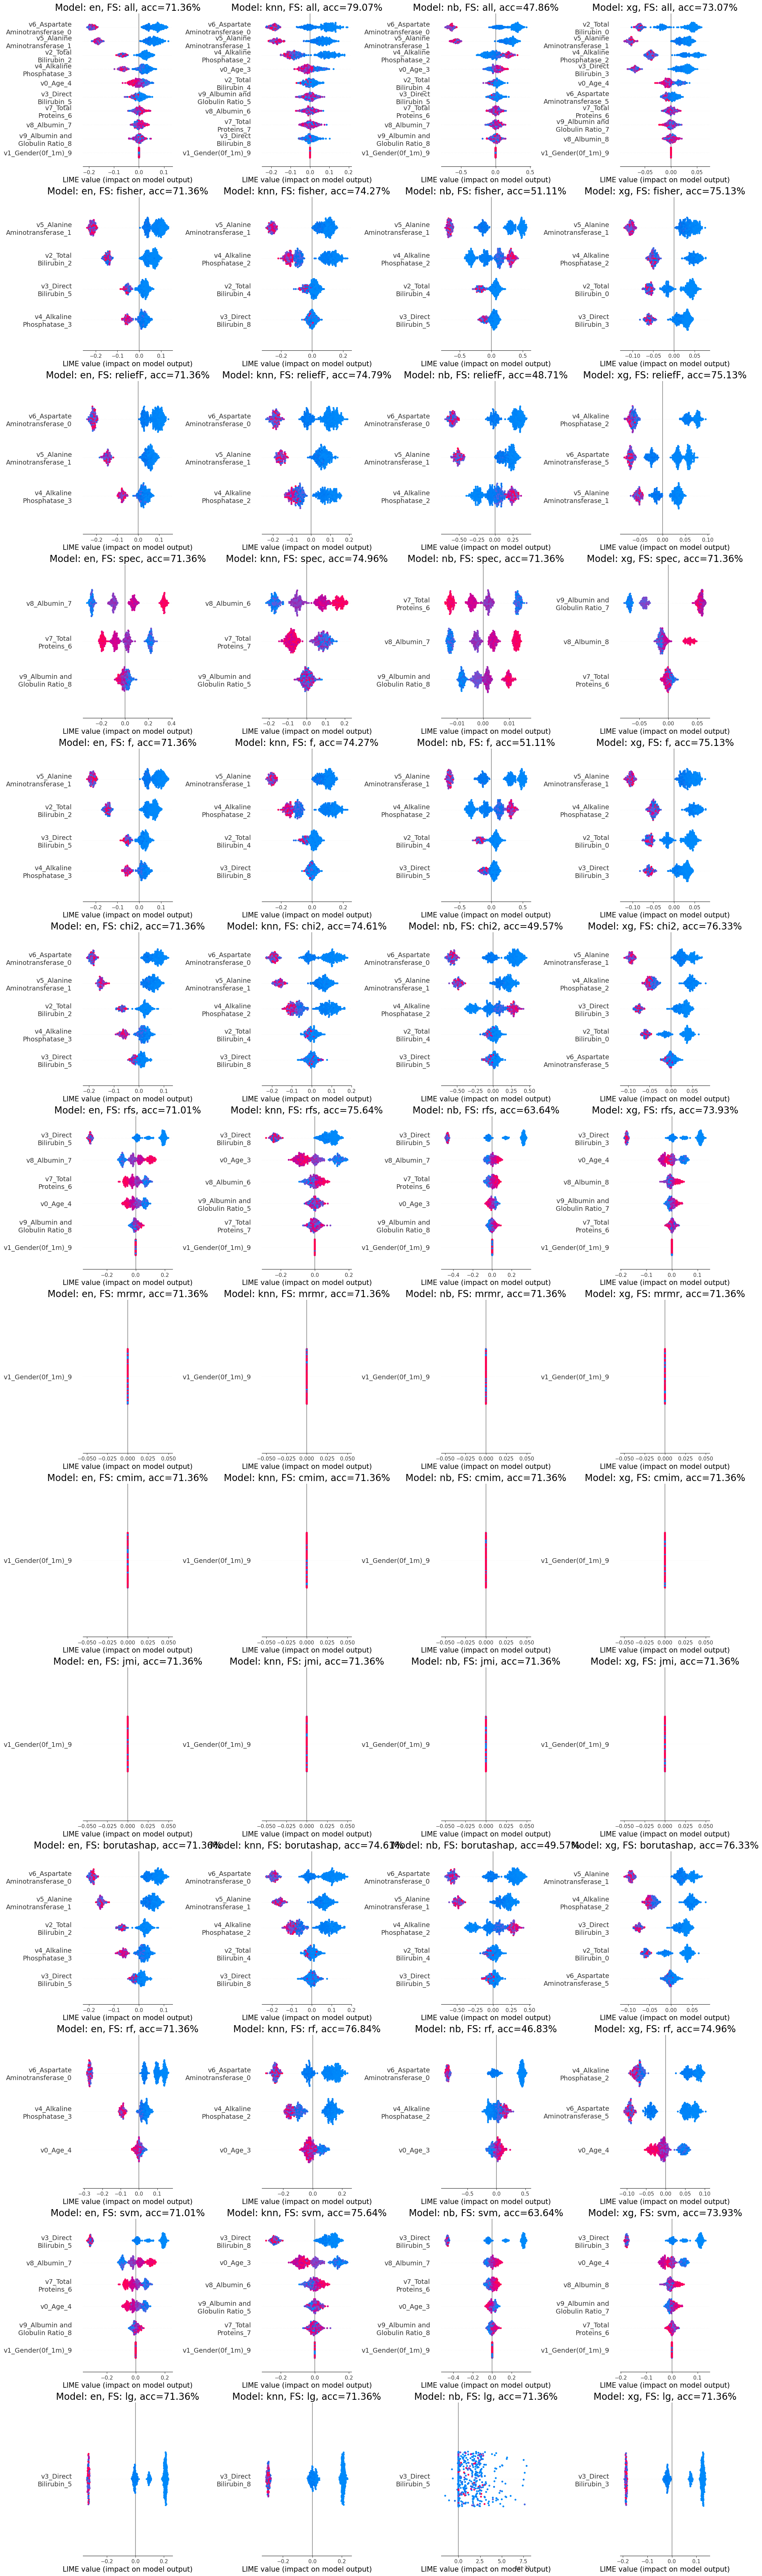

In [19]:
dataset_id = 41945
summary_41945 = utils.summary_comparison(dataset_id=dataset_id, feature_names=f_names[dataset_id], display_bacc=False, rsl_path=rsl_path, 
                                        fss=utils.default_fs, models = utils.default_all_models,
                                        nb_col = 4, nb_row = 14, row_height=7, accuracy_df = accuracy,
                                          # title = 'Indian Liver Patient dataset',
                                        title=False, feature_names_size=14,
                                                     wspace=1)

In [42]:
metric_final.loc[(slice(None), slice(None), dataset_id)].T

en                            \
           Kendall rank correlation coefficient Relative influence change   
all                                    1.000000                  0.000000   
fisher                                 0.666667                  0.281973   
relief                                 1.000000                  0.208599   
spec                                   0.333333                  0.288444   
f                                      0.666667                  0.281973   
chi2_nor                               1.000000                  0.103449   
RFS                                    0.200000                  0.334446   
mrmr                                        NaN                       NaN   
cmim                                        NaN                       NaN   
jmi                                         NaN                       NaN   
borutashap                             1.000000                  0.103449   
rf                                     1.000000                  0.310110   
lasso_svm                              0.200000                  0.334446   
lasso_lg                                    NaN                  0.392124   

                                                                    knn  \
                  RI           RIA Kendall rank correlation coefficient   
all         0.000000  0.000000e+00                             1.000000   
fisher      0.075605  1.678768e-17                             1.000000   
relief      0.018681  4.147991e-18                             1.000000   
spec        0.441626  9.806064e-17                            -0.333333   
f           0.075605  1.678768e-17                             1.000000   
chi2_nor    0.009719  2.158148e-18                             1.000000   
RFS         0.219687 -7.536420e-04                             0.066667   
mrmr             NaN           NaN                                  NaN   
cmim             NaN           NaN                                  NaN   
jmi              NaN           NaN                                  NaN   
borutashap  0.009719  2.158148e-18                             1.000000   
rf          0.077326  1.716989e-17                             1.000000   
lasso_svm   0.219687 -7.536420e-04                             0.066667   
lasso_lg    0.496747  1.103000e-16                                  NaN   

                                                                  \
           Relative influence change            RI           RIA   
all                         0.000000  0.000000e+00  0.000000e+00   
fisher                      0.131416  1.269457e-01 -6.096878e-03   
relief                      0.091985  1.313761e-16 -5.633623e-18   
spec                        0.140996  3.848682e-01 -1.584363e-02   
f                           0.131416  1.269457e-01 -6.096878e-03   
chi2_nor                    0.067250  5.163694e-02 -2.302848e-03   
RFS                         0.269487  2.173240e-01 -7.455367e-03   
mrmr                             NaN           NaN           NaN   
cmim                             NaN           NaN           NaN   
jmi                              NaN           NaN           NaN   
borutashap                  0.067250  5.163694e-02 -2.302848e-03   
rf                          0.081122  4.081424e-02 -9.100946e-04   
lasso_svm                   0.269487  2.173240e-01 -7.455367e-03   
lasso_lg                    0.360150  7.989896e-01 -6.167158e-02   

                                             nb                            \
           Kendall rank correlation coefficient Relative influence change   
all                                         1.0                  0.000000   
fisher                                      1.0                  0.162032   
relief                                      1.0                  0.094756   
spec                                        1.0                  0.195317   
f                                           1.0             

## Oxford Parkinson's Disease Detection dataset

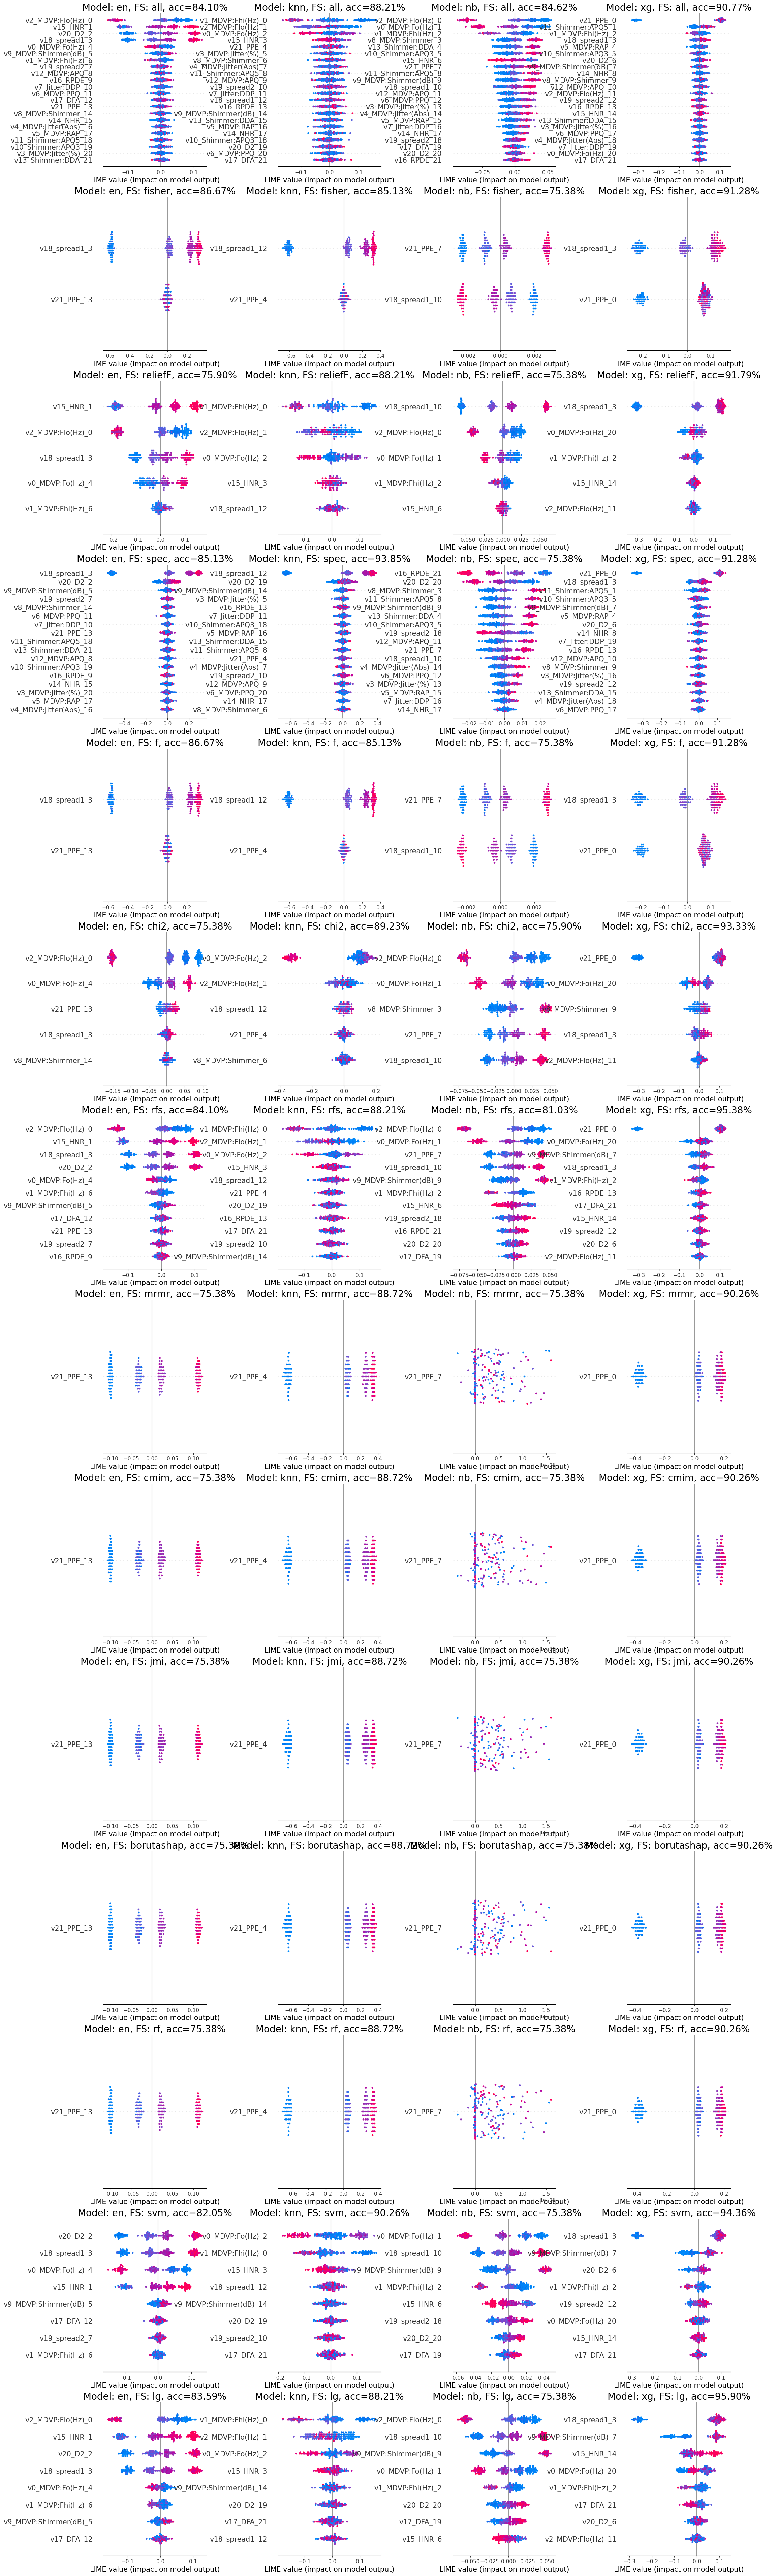

In [20]:
dataset_id=1488
summary_1488 = utils.summary_comparison(dataset_id=dataset_id, feature_names=f_names[dataset_id], display_bacc=False, rsl_path=rsl_path,
                                        fss=utils.default_fs, models = utils.default_all_models,
                                        nb_col = 4, nb_row = 14, row_height=7, accuracy_df = accuracy,
                                        
                                          #title = f'Oxford Parkinson’s Disease Detection dataset in the {model} ML model',
                                        title= False, wspace=0.7, feature_names_size=15
                                       )

In [43]:
metric_final.loc[(slice(None), slice(None), dataset_id)].T

en                            \
           Kendall rank correlation coefficient Relative influence change   
all                                    1.000000                  0.000000   
fisher                                 1.000000                  0.407902   
relief                                 0.800000                  0.150834   
spec                                   0.117647                  0.102037   
f                                      1.000000                  0.407902   
chi2_nor                              -0.200000                  0.258543   
RFS                                    0.418182                  0.033733   
mrmr                                        NaN                  0.058887   
cmim                                        NaN                  0.058887   
jmi                                         NaN                  0.058887   
borutashap                                  NaN                  0.058887   
rf                                          NaN                  0.058887   
lasso_svm                              0.000000                  0.076372   
lasso_lg                               0.785714                  0.068982   

                                                                    knn  \
                  RI           RIA Kendall rank correlation coefficient   
all         0.000000  0.000000e+00                             1.000000   
fisher      0.233859  5.996389e-03                            -1.000000   
relief      0.031540 -2.587902e-03                             1.000000   
spec        0.100753  1.033363e-03                             0.132353   
f           0.233859  5.996389e-03                            -1.000000   
chi2_nor    0.123201 -1.074062e-02                             0.400000   
RFS         0.030662  6.808349e-18                             0.636364   
mrmr        0.590091 -5.144382e-02                                  NaN   
cmim        0.590091 -5.144382e-02                                  NaN   
jmi         0.590091 -5.144382e-02                                  NaN   
borutashap  0.590091 -5.144382e-02                                  NaN   
rf          0.590091 -5.144382e-02                                  NaN   
lasso_svm   0.050614 -1.038245e-03                             0.428571   
lasso_lg    0.017370 -8.907870e-05                             0.500000   

                                                              \
           Relative influence change        RI           RIA   
all                         0.000000  0.000000  0.000000e+00   
fisher                      0.452664  0.304511 -9.369570e-03   
relief                      0.078554  0.042069  9.341215e-18   
spec                        0.136675  0.168418  9.500505e-03   
f                           0.452664  0.304511 -9.369570e-03   
chi2_nor                    0.247055  0.081053  8.313110e-04   
RFS                         0.092214  0.096274  2.137721e-17   
mrmr                        0.561093  0.181818  9.323993e-04   
cmim                        0.561093  0.181818  9.323993e-04   
jmi                         0.561093  0.181818  9.323993e-04   
borutashap                  0.561093  0.181818  9.323993e-04   
rf                          0.561093  0.181818  9.323993e-04   
lasso_svm                   0.102667  0.170806  3.503722e-03   
lasso_lg                    0.089255  0.133908  2.973358e-17   

                                             nb                            \
           Kendall rank correlation coefficient Relative influence change   
all                                    1.000000                  0.000000   
fisher                                 1.000000                  0.145688   
relief                                 0.200000                  0.185731   
spec                                  -0.176471                  0.105955   
f                                      1.000000                  0.145688   
chi2_nor                               1.000000

# 3D plot

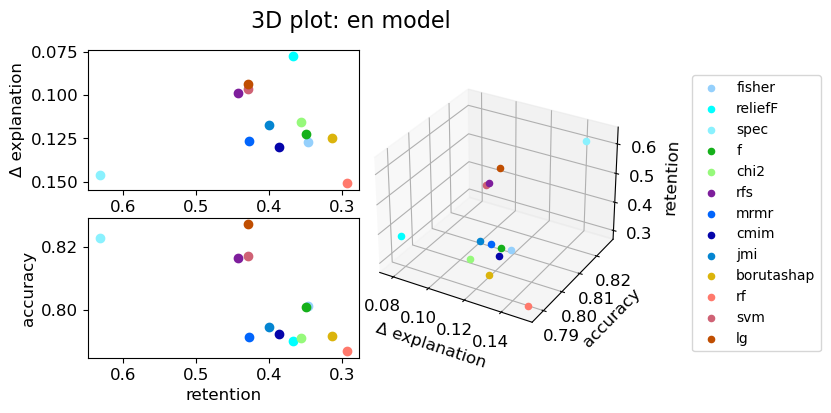

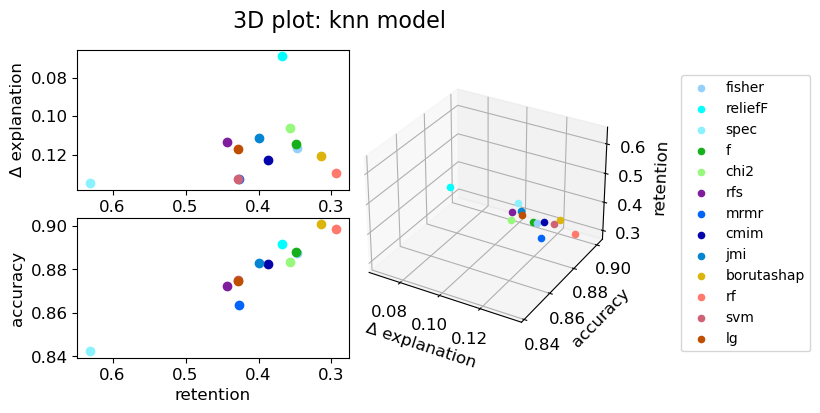

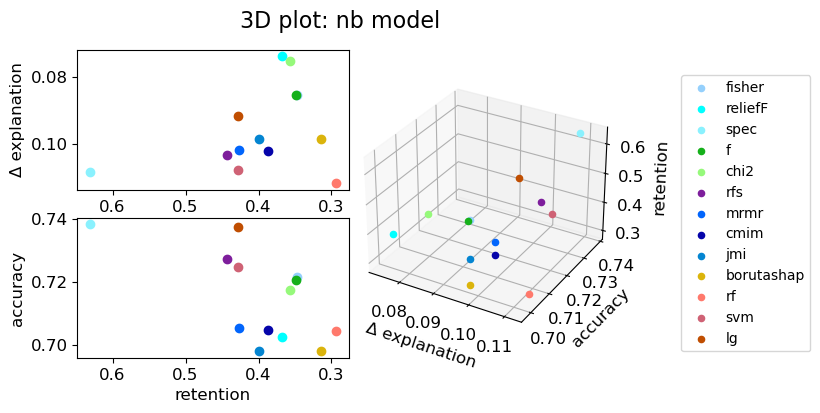

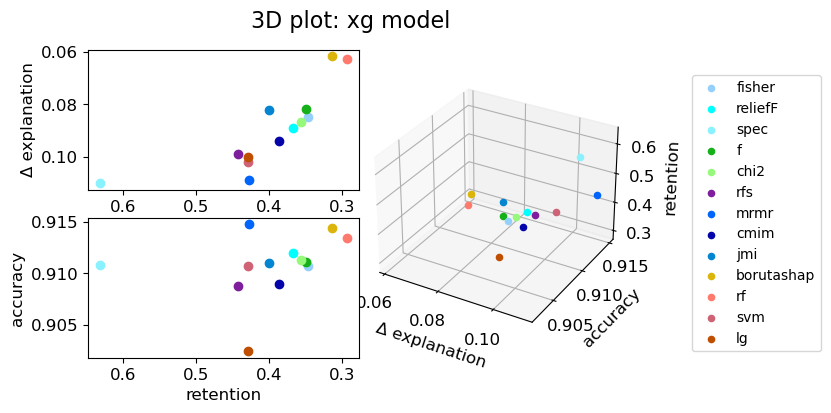

In [9]:
importlib.reload(utils)
for m in utils.default_all_models:
    fig = utils.show_3d_plot(model=m, metric='RI' ,
                             rsl_metric=metric_final, rsl_accuracy=accuracy, rsl_retention= selection_rate,
                             anno=False)
    fig.suptitle(f'3D plot: {m} model', fontsize=16)

# Statistics

## heatmap

In [7]:
import copy
fs_wo_all = copy.deepcopy(utils.default_fs)
_ = fs_wo_all.pop("all")

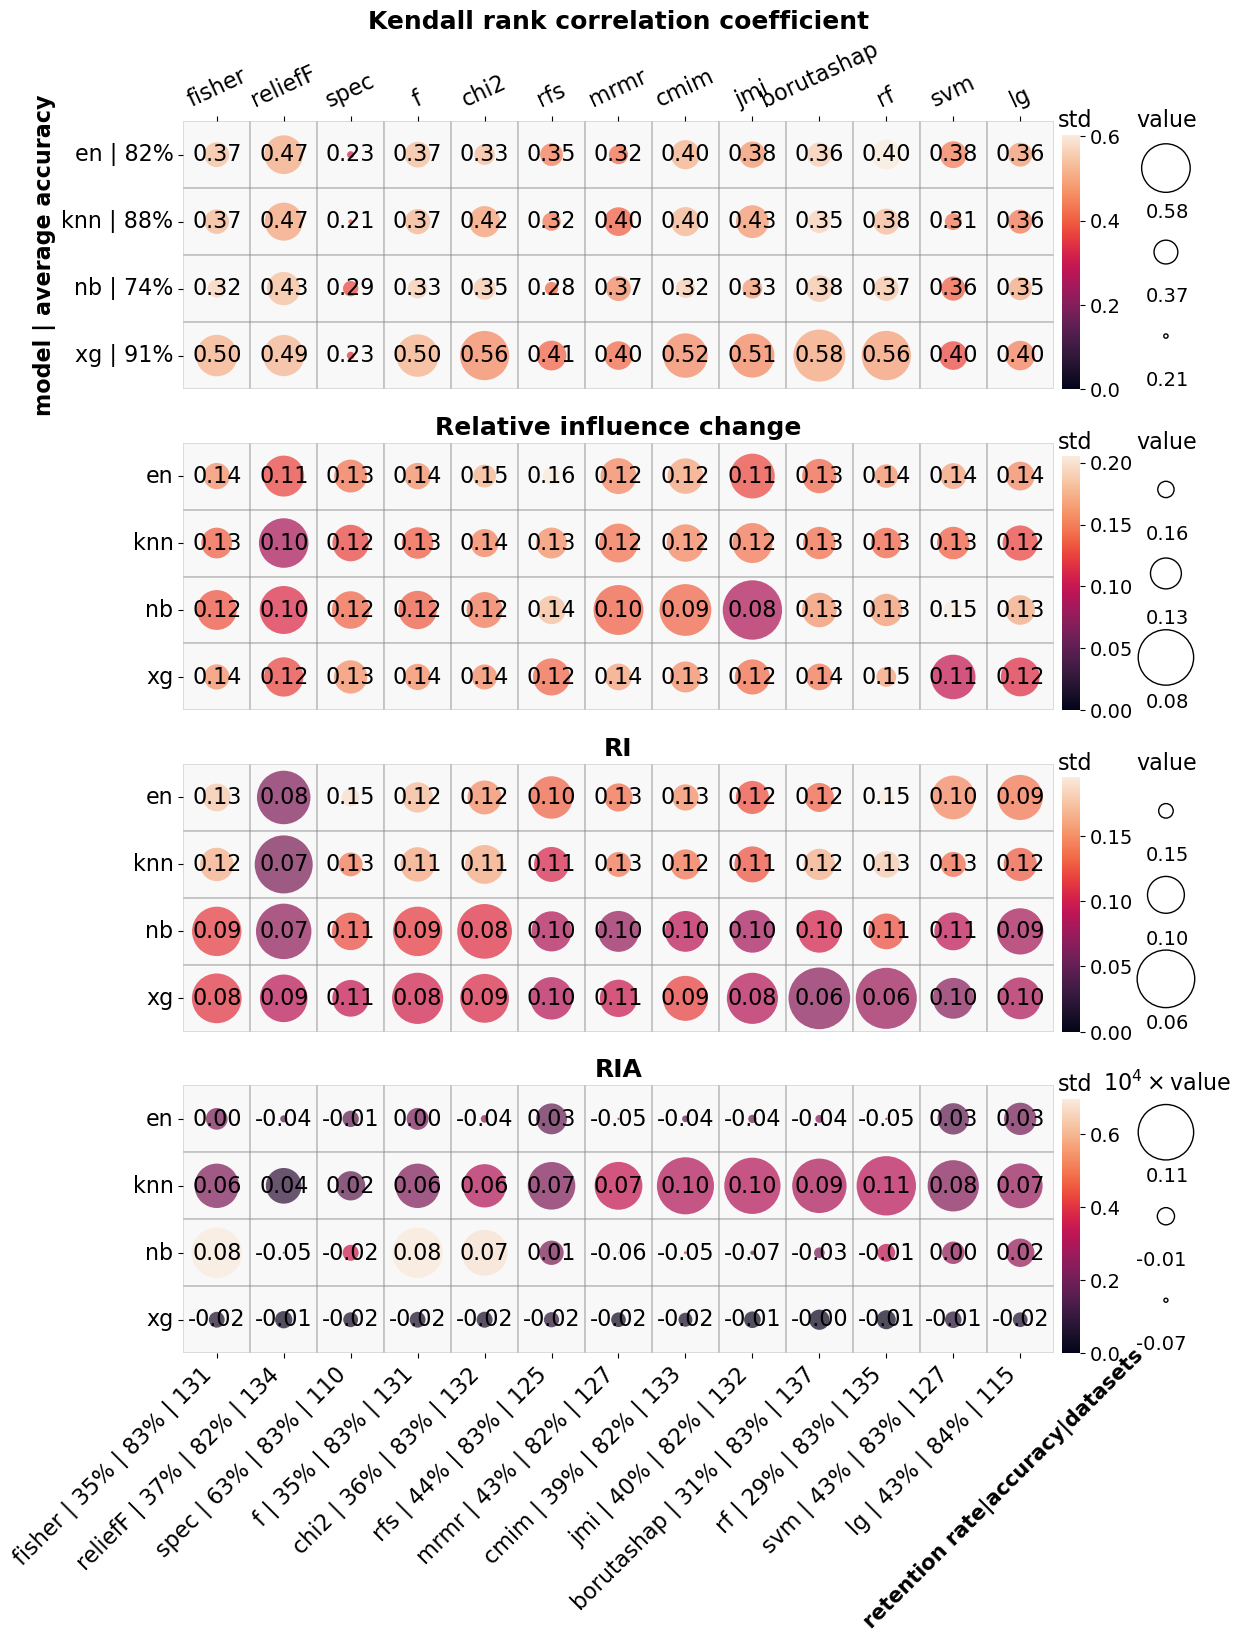

In [28]:
xaxis=['top', None, None, True]
yaxis = [True, False, False, False]
fig, ax = plt.subplots(4, figsize=(14, 16))
for i, metric in enumerate(utils.default_metrics_dic.keys()):
    fig = utils.display_heatmap(metrics_rsl_df=metric_final, selection_rate_df=selection_rate, accuracy_df=accuracy, 
                                metric_arc=metric, RIA_rescale=4, legend_vs=True,
                                fs_on_plt=fs_wo_all, datasets=all_ds,
                                    # display_best = False, datasets=all_ds, 
                                rename_xaxis=xaxis[i], rename_yaxis=yaxis[i],
                                tick_size=16, label_size=16, font_size=16, 
                                    #metrics_f = func_user.fs_utils.default_metrics_dic,
                                circle_color='std', circle_size='mean', title=None,
                                ax=ax[i])
fig.text(0.788, 0.115, 'retention rate|accuracy|datasets', ha='center', va='top',rotation=45, size=15, weight='bold')
plt.show()

## Kendall rank correlation coefficient

In [31]:
metric_final.loc[slice(None), 'Kendall rank correlation coefficient',slice(None)].groupby(level=0).mean()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   1.0  0.367248  0.474593  0.230197  0.374472  0.332944  0.350395   
knn  1.0  0.365457  0.468951  0.210554  0.370148  0.415991  0.317636   
nb   1.0  0.315919  0.432838  0.294014  0.327414  0.347244  0.278368   
xg   1.0  0.495802  0.493583  0.234618  0.503205  0.555386  0.405224   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.323176  0.400326  0.378740    0.362493  0.403473   0.382873  0.360190  
knn  0.396811  0.400354  0.428710    0.351033  0.376379   0.305778  0.360364  
nb   0.367685  0.322799  0.328262    0.381799  0.366385   0.362195  0.354455  
xg   0.395881  0.518239  0.514954    0.577122  0.556490   0.396647  0.403309

In [32]:
metric_final.loc[slice(None), 'Kendall rank correlation coefficient',slice(None)].groupby(level=0).std()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   1.030243e-16  0.532429  0.500662  0.316643  0.530026  0.529879  0.435752   
knn  1.030243e-16  0.520733  0.489971  0.386467  0.517278  0.482139  0.433549   
nb   1.030243e-16  0.564014  0.531620  0.373800  0.553523  0.545949  0.411832   
xg   1.030243e-16  0.509977  0.517564  0.344497  0.510279  0.451779  0.401288   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.415712  0.509728  0.471256    0.555286  0.603937   0.435866  0.478036  
knn  0.400819  0.516293  0.474500    0.562739  0.526981   0.430068  0.429754  
nb   0.453189  0.553202  0.476872    0.545022  0.544931   0.398734  0.498738  
xg   0.411168  0.452998  0.450405    0.492688  0.482597   0.372524  0.442578

## Relative influence change

In [36]:
metric_final.loc[slice(None), 'Relative influence change',slice(None)].groupby(level=0).mean()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.139832  0.113707  0.128031  0.139632  0.145873  0.155445   
knn  0.0  0.131797  0.098444  0.121674  0.130557  0.136624  0.131543   
nb   0.0  0.115643  0.101266  0.119856  0.118409  0.122737  0.136125   
xg   0.0  0.141535  0.116608  0.127369  0.139791  0.141864  0.120566   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.122679  0.123402  0.106888    0.125474  0.144674   0.140527  0.135263  
knn  0.117375  0.119924  0.115420    0.128981  0.132277   0.128703  0.124016  
nb   0.097848  0.094489  0.080904    0.125071  0.129036   0.152808  0.133803  
xg   0.138944  0.131304  0.124080    0.139194  0.151287   0.107295  0.117583

In [37]:
metric_final.loc[slice(None), 'Relative influence change',slice(None)].groupby(level=0).std()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.156534  0.124586  0.144269  0.156648  0.174719  0.203298   
knn  0.0  0.134950  0.085294  0.125661  0.133215  0.149728  0.156882   
nb   0.0  0.130027  0.112900  0.138177  0.134494  0.146072  0.181135   
xg   0.0  0.156575  0.125781  0.156477  0.155053  0.153548  0.139010   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.152771  0.166465  0.126033    0.138589  0.157663   0.165028  0.154527  
knn  0.143299  0.152584  0.146456    0.141163  0.136522   0.135800  0.124483  
nb   0.134813  0.138135  0.089452    0.158774  0.162137   0.205274  0.169583  
xg   0.165425  0.156231  0.141173    0.146376  0.165541   0.099124  0.114383

## RI metric

In [38]:
metric_final.loc[slice(None), 'RI',slice(None)].groupby(level=0).mean()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.127415  0.077462  0.146134  0.122417  0.115414  0.098865   
knn  0.0  0.116514  0.068697  0.134998  0.114604  0.105922  0.113467   
nb   0.0  0.085463  0.073685  0.108510  0.085319  0.075164  0.103428   
xg   0.0  0.084777  0.088930  0.110089  0.081928  0.086579  0.098953   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.126653  0.130172  0.117063    0.124961  0.151040   0.096419  0.093742  
knn  0.132883  0.122964  0.111446    0.120538  0.129580   0.132596  0.116899  
nb   0.101883  0.102085  0.098668    0.098657  0.111877   0.107885  0.091562  
xg   0.108850  0.094020  0.082112    0.061629  0.062848   0.102095  0.100127

In [39]:
metric_final.loc[slice(None), 'RI',slice(None)].groupby(level=0).std()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.175933  0.063234  0.188519  0.169348  0.148090  0.130565   
knn  0.0  0.163025  0.061201  0.139619  0.160456  0.160750  0.104062   
nb   0.0  0.115315  0.069989  0.121483  0.114512  0.109428  0.084607   
xg   0.0  0.111350  0.089448  0.095014  0.100904  0.105852  0.087252   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.133937  0.148944  0.122298    0.129779  0.194714   0.146357  0.138232  
knn  0.138691  0.136421  0.123219    0.163567  0.177804   0.133126  0.127493  
nb   0.072704  0.089443  0.079767    0.102593  0.122327   0.091417  0.079980  
xg   0.096698  0.117434  0.086723    0.068651  0.075620   0.067476  0.083034

## RIA

In [40]:
metric_final.loc[slice(None), 'RIA',slice(None)].groupby(level=0).mean()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.000051 -0.002886 -0.001021  0.000101 -0.002781  0.001885   
knn  0.0  0.004594  0.002853  0.001564  0.004594  0.004374  0.005233   
nb   0.0  0.005841 -0.003893 -0.001083  0.005782  0.004903  0.000571   
xg   0.0 -0.001127 -0.000835 -0.001326 -0.001124 -0.001096 -0.001248   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en  -0.003854 -0.002969 -0.002650   -0.002706 -0.003849   0.001985  0.002168  
knn  0.005278  0.007138  0.006971    0.006601  0.007599   0.005967  0.004676  
nb  -0.004113 -0.003686 -0.005163   -0.002162 -0.000727   0.000196  0.001384  
xg  -0.001364 -0.001500 -0.000966   -0.000252 -0.000492  -0.000980 -0.001350

In [41]:
metric_final.loc[slice(None), 'RIA',slice(None)].groupby(level=0).std()

all    fisher    relief      spec         f  chi2_nor       RFS  \
en   0.0  0.015416  0.011872  0.012163  0.015398  0.019065  0.013201   
knn  0.0  0.016278  0.006736  0.012364  0.016276  0.021892  0.015983   
nb   0.0  0.049821  0.010039  0.025305  0.049620  0.048656  0.015679   
xg   0.0  0.004280  0.002627  0.003760  0.004274  0.004271  0.006095   

         mrmr      cmim       jmi  borutashap        rf  lasso_svm  lasso_lg  
en   0.016641  0.013660  0.014217    0.017556  0.017733   0.012791  0.014865  
knn  0.023993  0.021934  0.022136    0.021317  0.022624   0.016826  0.018986  
nb   0.011269  0.029722  0.015161    0.015564  0.023378   0.018206  0.018986  
xg   0.002854  0.003698  0.002682    0.002124  0.002190   0.005754  0.004863

# Dataset filters determination

In [89]:
datasets_active = openml.datasets.list_datasets(status="active", output_format="dataframe")
datasets_active_cla = datasets_active.query(
    'NumberOfInstancesWithMissingValues == 0 & '
    'NumberOfMissingValues == 0 & '
    'NumberOfClasses == 2 & '
    #'NumberOfFeatures > 10 &'
    #'NumberOfFeatures < 150 &'
    #'NumberOfInstances < 12000  &  '
    'NumberOfNumericFeatures == NumberOfFeatures - 1 '
)

len(datasets_active_cla)

803

## Number of Features

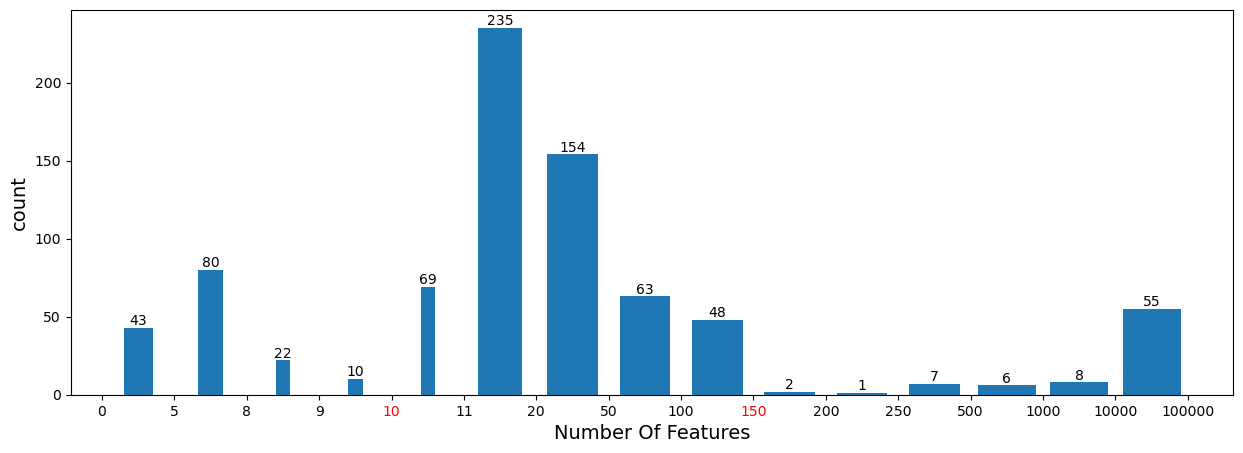

In [103]:
fig, ax = plt.subplots(figsize=(15,5))
bins = [0, 5, 8, 9, 10, 11, 20, 50, 100, 150, 200, 250, 500, 1000, 10000, 100000]
width = [0.4, 0.35, 0.2, 0.2, 0.2, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,0.8, 0.8, 0.8, 0.9   ]
height = np.histogram(datasets_active_cla['NumberOfFeatures']-1, bins=bins)[0]
x_loc = range(len(bins))
for j,h in enumerate(height):
    ax.bar(x_loc[j], h, color='C0', width=width[j])
ticks =[i-0.5 for i in x_loc]
# label_color = ['red' if i in[10, 150] else 'black' for i in bins  ]
ax.set_xticks(ticks=ticks,labels=bins)
ticklabels = ax.get_xticklabels()
[ticklabels[i].set_color('red') for i,b in enumerate(bins) if b in[10, 150]]
for x, h in zip(x_loc[:-1], height):
    ax.text(x, h, str(h), ha="center", va="bottom")
ax.set_ylabel('count', size=14)
ax.set_xlabel('Number Of Features', size=14)
plt.show()

## Number of Instance

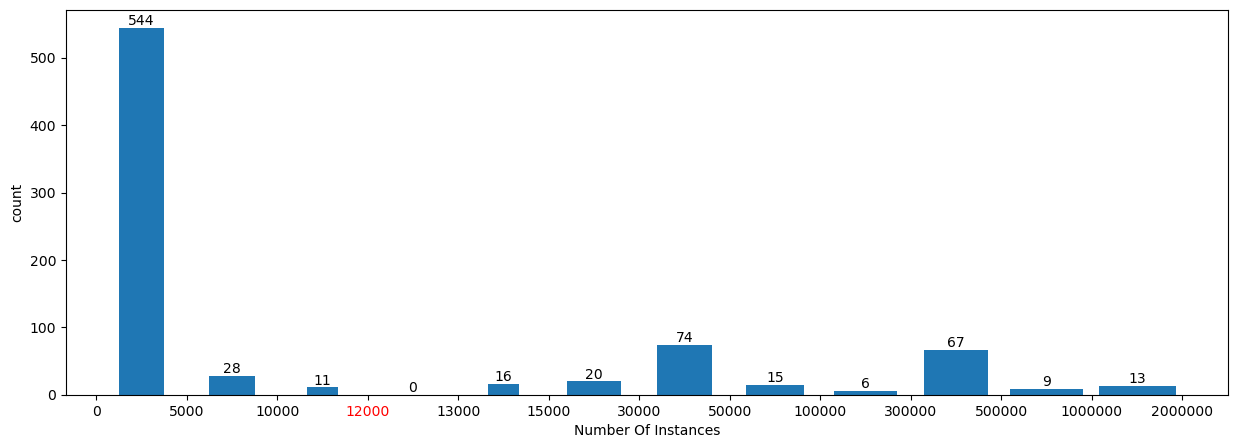

In [106]:
fig, ax = plt.subplots(figsize=(15,5))
bins = [0, 5000, 10000, 12000, 13000, 15000, 30000, 50000,  100000, 300000, 500000, 1000000, 2000000]
width = [0.5, 0.5, 0.35, 0.2, 0.35, 0.6, 0.6, 0.65, 0.7, 0.7, 0.8, 0.85]
height = np.histogram(datasets_active_cla['NumberOfInstances'], bins=bins)[0]
x_loc = range(len(bins))
for j,h in enumerate(height):
    ax.bar(x_loc[j], h, color='C0', width=width[j])
ticks =[i-0.5 for i in x_loc]
# label_color = ['red' if i in[10, 150] else 'black' for i in bins  ]
ax.set_xticks(ticks=ticks,labels=bins)
ticklabels = ax.get_xticklabels()
[ticklabels[i].set_color('red') for i,b in enumerate(bins) if b in[12000]]
for x, h in zip(x_loc[:-1], height):
    ax.text(x, h, str(h), ha="center", va="bottom")
ax.set_ylabel('count')
ax.set_xlabel('Number Of Instances')
ax.figure.savefig(f'{image_path}/instance.png', dpi=200, bbox_inches='tight')
plt.show()